In [1]:
import baccoemu
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import scipy
import warnings

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import plot_utils
import plotter
import utils
import data_loader
import generate_params_lh as gplh

%load_ext autoreload
%autoreload 2

2025-05-13 10:12:26.082839: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-13 10:12:26.193769: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-13 10:12:26.193811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-13 10:12:26.210080: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-13 10:12:26.243036: I tensorflow/core/platform/cpu_feature_guar

In [2]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [3]:
data_mode = 'muchisimocksPk'
assert data_mode in ['emuPk', 'muchisimocksPk']

idxs_obs = [0]

In [4]:
#tag_flow = '_nsf'
tag_flow = ''

In [18]:
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n10000'
tag_biasparams_x10 = '_biaszen_p4_n100000'

n_train_arr = [500, 1000, 2000, 4000, 6000, 8000, 10000]

inf_methods = ['sbi']*len(n_train_arr)
tags_inf = [
            f'_muchisimocksPk{tag_params}{tag_biasparams_x10}_ntrain{n_train}_best-sbi-rand10' for n_train in n_train_arr
            ]
labels_extra = [
                f'n_train={n_train}' for n_train in n_train_arr
                ]

def green_shades(N):
    return [plt.cm.Greens(0.4 + 0.6 * i / (N - 1)) for i in range(N)]
    #return [plt.cm.Greens(i / (N - 1)) for i in range(N)]

# Example usage:
colors = green_shades(len(n_train_arr))

In [6]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary = [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]

In [7]:
# load fixed-cosmo test set
tag_params_test = '_quijote_p0_n1000'
tag_biasparams_test = '_b1000_p0_n1'
tag_datagen_test = ''
tag_data_test_fixed = '_'+data_mode + tag_params_test + tag_biasparams_test + tag_datagen_test
print(tag_data_test_fixed)
theta_test_fixed = data_loader.load_theta_test(tag_params_test, tag_biasparams_test, 
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary)
print(theta_test_fixed.shape)

# get bounds
_, dict_bounds_cosmo, _ = gplh.define_LH_cosmo(tag_params)
_, dict_bounds_bias, _ = gplh.define_LH_bias(tag_biasparams)
extents = {**dict_bounds_cosmo, **dict_bounds_bias}

_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1
(9,)


[0.3175 0.834  0.6711 0.049  0.9624 1.     0.     0.     0.    ]
['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl']
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_biaszen_p4_n100000_ntrain500_best-sbi-rand10/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 9)
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_biaszen_p4_n100000_ntrain1000_best-sbi-rand10/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 9)
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_biaszen_p4_n100000_ntrain2000_best-sbi-rand10/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 9)
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_biaszen_p4_n100000_ntrain4000_best-sbi-rand10/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 9)
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_

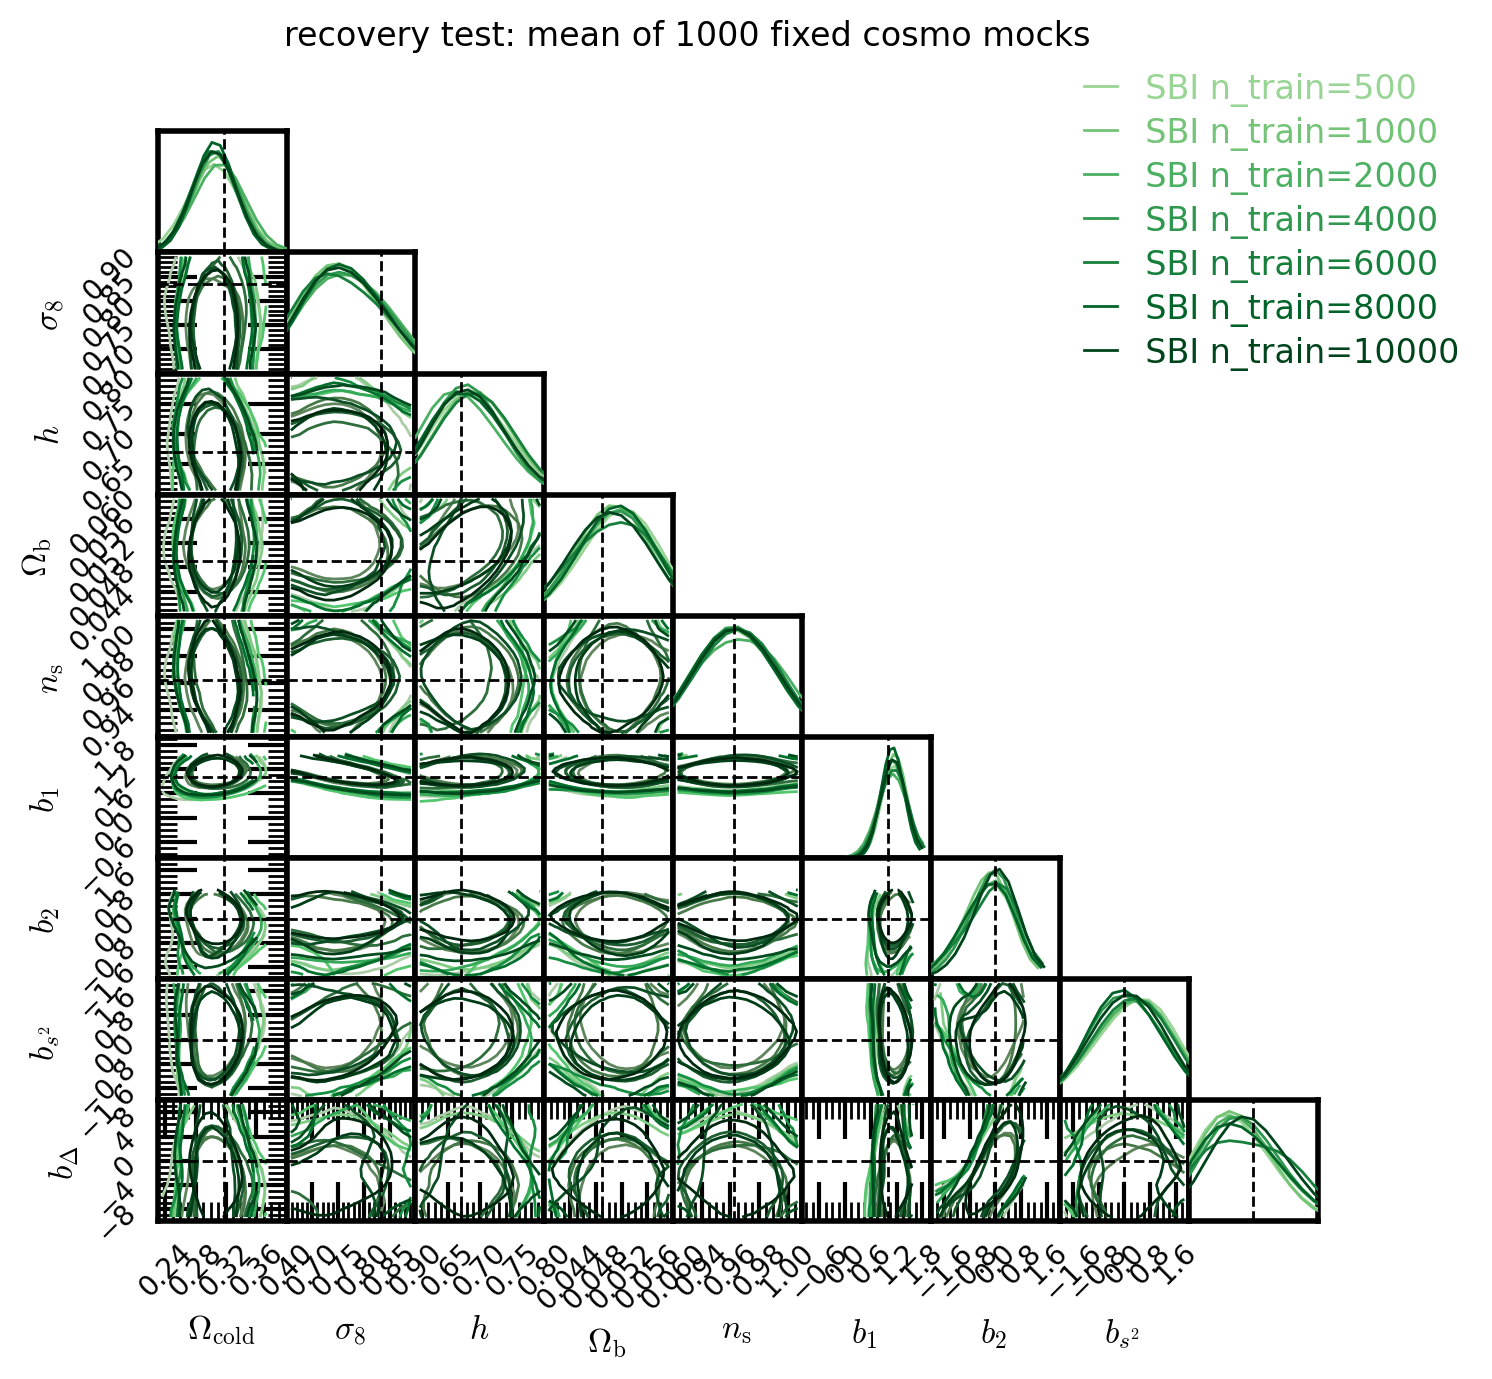

In [19]:
print(theta_test_fixed)
print(param_names_vary)
idx_obs = 0
title = 'recovery test: mean of 1000 fixed cosmo mocks'
tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
param_names_vary = cosmo_param_names_vary + utils.biasparam_names_ordered
plotter.plot_contours_inf(param_names_vary, idx_obs, theta_test_fixed, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels_extra=labels_extra,
                        title=title, extents=extents)

In [20]:
theta_test_pred_fixed_arr, covs_test_pred_fixed_arr = [], []
for i, tag_inf in enumerate(tags_inf):
    theta_test_pred_fixed, covs_test_pred_fixed, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_test[i])
    theta_test_pred_fixed_arr.append(theta_test_pred_fixed[0])
    covs_test_pred_fixed_arr.append(covs_test_pred_fixed[0])
    
theta_test_pred_fixed_arr = np.array(theta_test_pred_fixed_arr)
covs_test_pred_fixed_arr = np.array(covs_test_pred_fixed_arr)
print(theta_test_pred_fixed_arr.shape, covs_test_pred_fixed_arr.shape)

(10000, 1, 9)
(10000, 1, 9)
(10000, 1, 9)
(10000, 1, 9)
(10000, 1, 9)
(10000, 1, 9)
(10000, 1, 9)
(7, 9) (7, 9, 9)


In [21]:
param_names_vary

['omega_cold',
 'sigma8_cold',
 'hubble',
 'omega_baryon',
 'ns',
 'b1',
 'b2',
 'bs2',
 'bl']

In [22]:
theta_test_fixed

array([0.3175, 0.834 , 0.6711, 0.049 , 0.9624, 1.    , 0.    , 0.    ,
       0.    ])

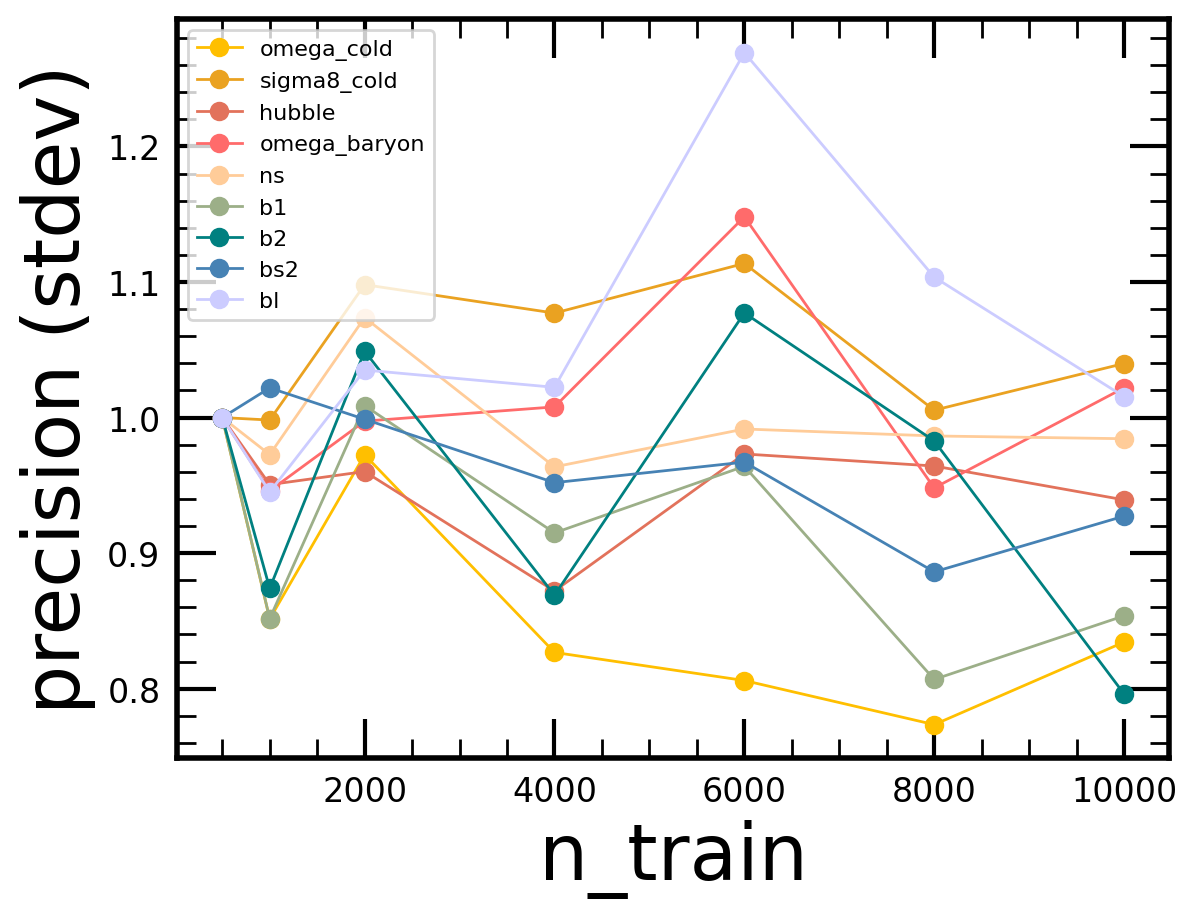

In [23]:
colors_params = ["#FFBF00", "#EAA221", "#E2725B", "#FF6B6B", "#FFCC99", "#9CAF88", "#008080", "#4682B4", "#CCCCFF"]

for i_pn, param_name in enumerate(param_names_vary):

    #if param_name not in ['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns']:
    #if param_name not in ['omega_cold']:
    #    continue

    stdevs = [np.sqrt(covs_test_pred_fixed_arr[i_ntrain,i_pn,i_pn]) for i_ntrain in range(len(n_train_arr))]
    plt.plot(n_train_arr, 
             #stdevs/theta_test_pred_fixed_arr[:,i_pn],
             stdevs/stdevs[0],
             marker='o', lw=1, color=colors_params[i_pn], label=param_name)
    
    # param_range = np.max(theta_true_arr[:,:,i_pn]) - np.min(theta_true_arr[:,:,i_pn])
    # print(param_range, np.min(theta_true_arr[:,:,i_pn]), np.max(theta_true_arr[:,:,i_pn]))
    # plt.plot(n_train_arr, loss_param_test_arr/param_range**2, 
    #         marker='o', lw=1, color=colors_params[i_pn], label=param_name)

plt.xlabel('n_train')
plt.ylabel('precision (stdev)')
plt.legend(fontsize=8, loc='upper left')

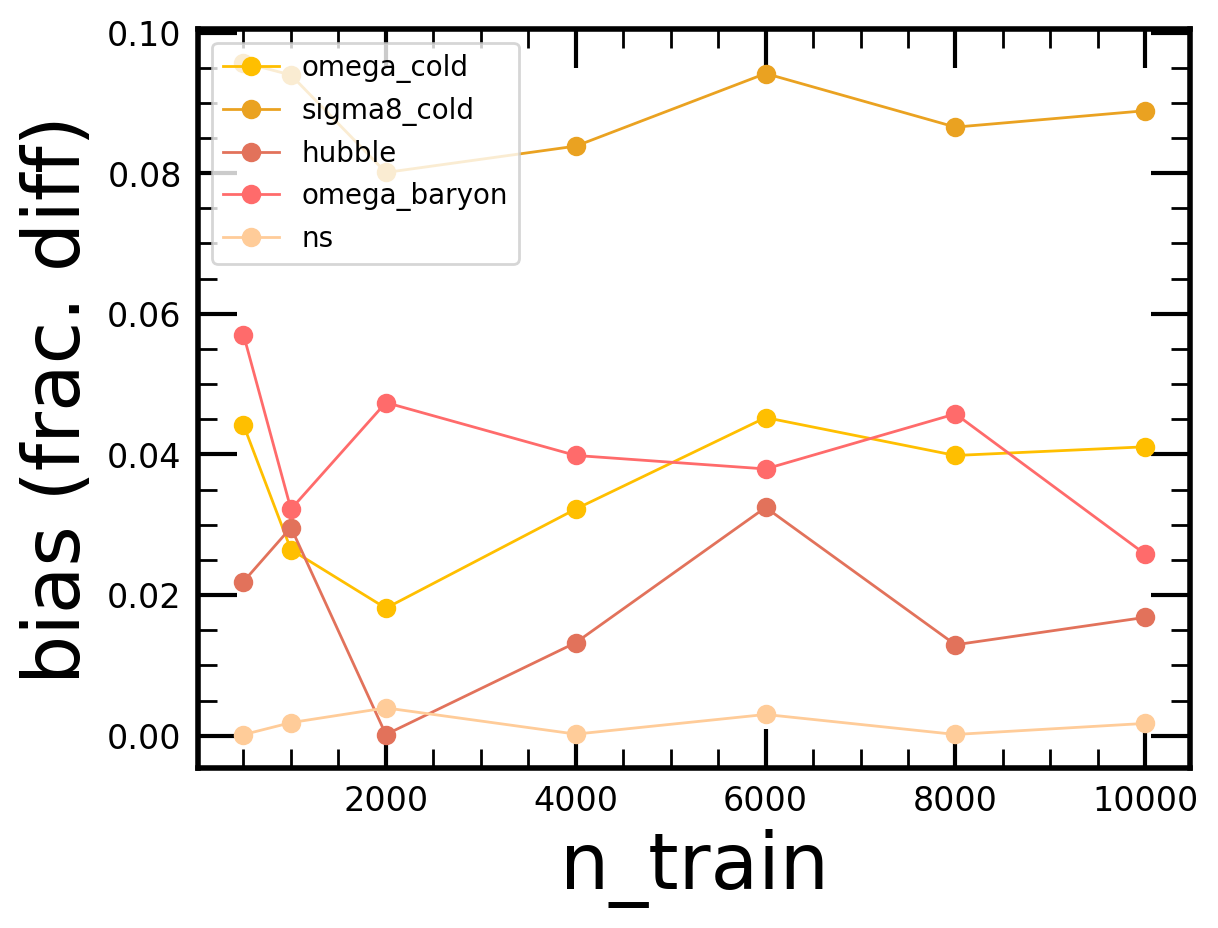

In [24]:
for i_pn, param_name in enumerate(param_names_vary):

    if param_name not in ['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns']:
    #if param_name not in ['omega_cold']:
        continue

    stdevs = [np.sqrt(covs_test_pred_fixed_arr[i_ntrain,i_pn,i_pn]) for i_ntrain in range(len(n_train_arr))]
    plt.plot(n_train_arr, 
             np.abs(theta_test_pred_fixed_arr[:,i_pn]-theta_test_fixed[i_pn])/theta_test_fixed[i_pn],
             marker='o', lw=1, color=colors_params[i_pn], label=param_name)
    
    # param_range = np.max(theta_true_arr[:,:,i_pn]) - np.min(theta_true_arr[:,:,i_pn])
    # print(param_range, np.min(theta_true_arr[:,:,i_pn]), np.max(theta_true_arr[:,:,i_pn]))
    # plt.plot(n_train_arr, loss_param_test_arr/param_range**2, 
    #         marker='o', lw=1, color=colors_params[i_pn], label=param_name)

plt.xlabel('n_train')
plt.ylabel('bias (frac. diff)')
plt.legend(fontsize=10, loc='upper left')

In [25]:
# load test set matched to training sest
tag_params_test = '_test_p5_n1000'
tags_biasparams_test = [
                        '_biaszen_p4_n1000',
                        ]*len(tags_inf)
tag_datagen_test = ''
tags_data_test = ['_'+data_mode + tag_params_test + tag_biasparams_test + tag_datagen_test for tag_biasparams_test in tags_biasparams_test]
for tag_data_test in tags_data_test:
    print(tag_data_test)

_muchisimocksPk_test_p5_n1000_biaszen_p4_n1000
_muchisimocksPk_test_p5_n1000_biaszen_p4_n1000
_muchisimocksPk_test_p5_n1000_biaszen_p4_n1000
_muchisimocksPk_test_p5_n1000_biaszen_p4_n1000
_muchisimocksPk_test_p5_n1000_biaszen_p4_n1000
_muchisimocksPk_test_p5_n1000_biaszen_p4_n1000
_muchisimocksPk_test_p5_n1000_biaszen_p4_n1000


In [26]:
param_names_show = cosmo_param_names_vary + utils.biasparam_names_ordered
#param_names_show = cosmo_param_names_vary + ['b1']
theta_true_arr, theta_pred_arr, vars_pred_arr = [], [], []
covs_pred_arr = [] #note that this will be for all params, not just show, for now
for i, tag_inf in enumerate(tags_inf):

    _theta_test_pred, _covs_test_pred, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_data_test[i],
                                                                     #param_names=param_names_show
                                                                     )
    theta_test = data_loader.load_theta_test(tag_params_test, tags_biasparams_test[i])
    theta_true_inf, theta_pred_inf, vars_pred_inf = [], [], []
    for param_name_show in param_names_show:
        if param_name_show in param_names:
            idx_pn = list(param_names).index(param_name_show)
            theta_true_inf.append(theta_test[:,idx_pn])
            theta_pred_inf.append(_theta_test_pred[:,idx_pn])
            vars_pred_inf.append(_covs_test_pred[:,idx_pn,idx_pn])
            #covs_pred_arr.append(_covs_test_pred[:,idx_pn,idx_pn])
        else:
            nans = np.full(_theta_test_pred.shape[0], np.nan)
            theta_true_inf.append(nans)
            theta_pred_inf.append(nans)
            vars_pred_inf.append(nans)
            #covs_pred_arr.append(None)

    theta_true_arr.append(np.array(theta_true_inf).T)
    theta_pred_arr.append(np.array(theta_pred_inf).T)
    vars_pred_arr.append(np.array(vars_pred_inf).T)
    covs_pred_arr.append(_covs_test_pred)
    
theta_true_arr = np.array(theta_true_arr)
theta_pred_arr = np.array(theta_pred_arr)
vars_pred_arr = np.array(vars_pred_arr)
covs_pred_arr = np.array(covs_pred_arr)

(10000, 1000, 9)
(10000, 1000, 9)
(10000, 1000, 9)
(10000, 1000, 9)
(10000, 1000, 9)
(10000, 1000, 9)
(10000, 1000, 9)


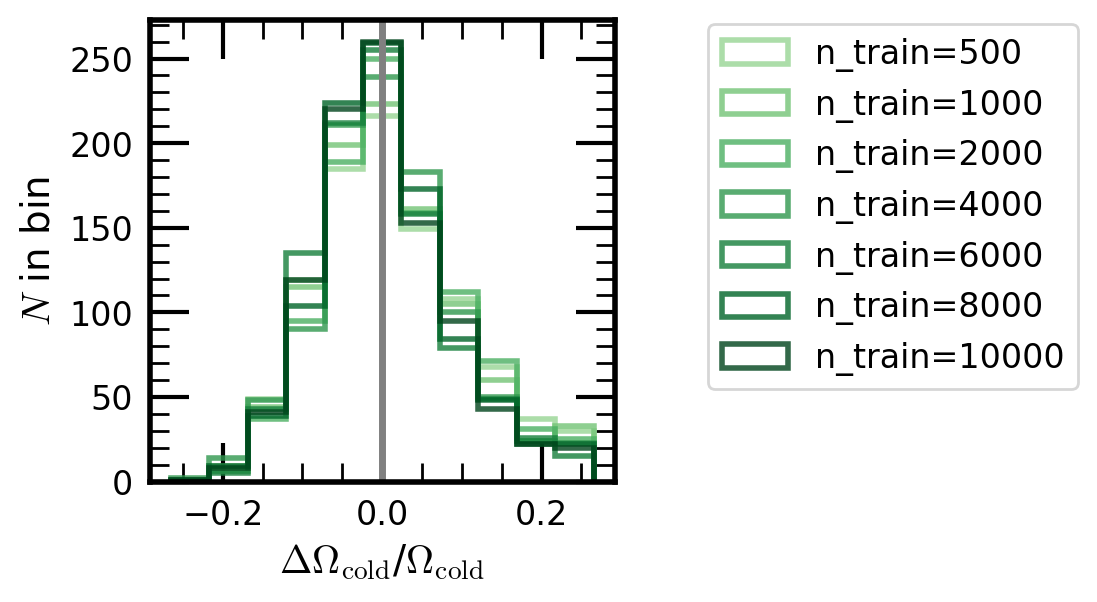

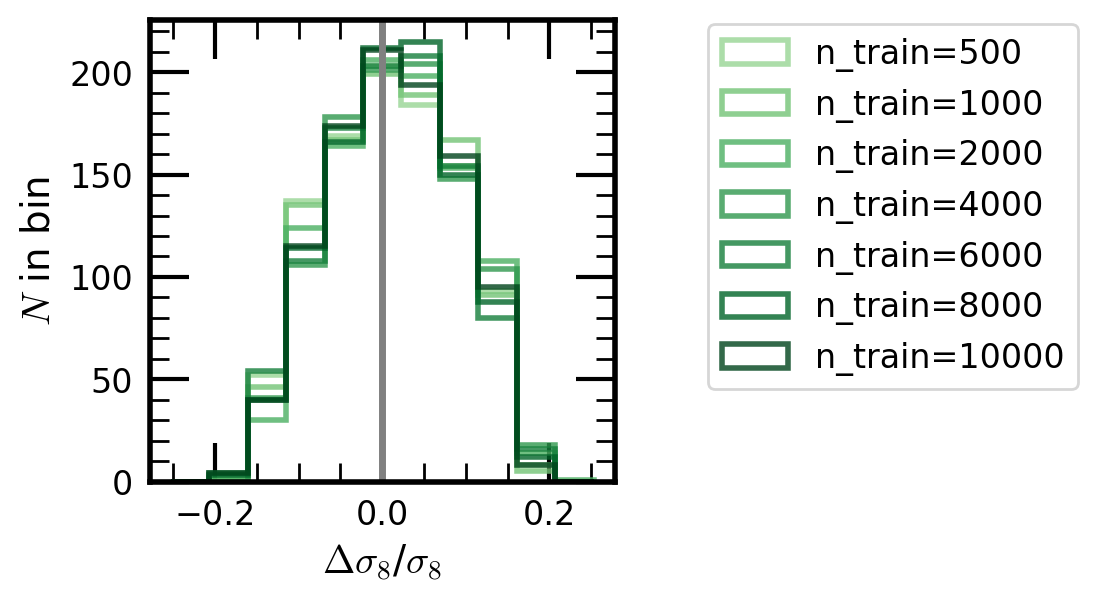

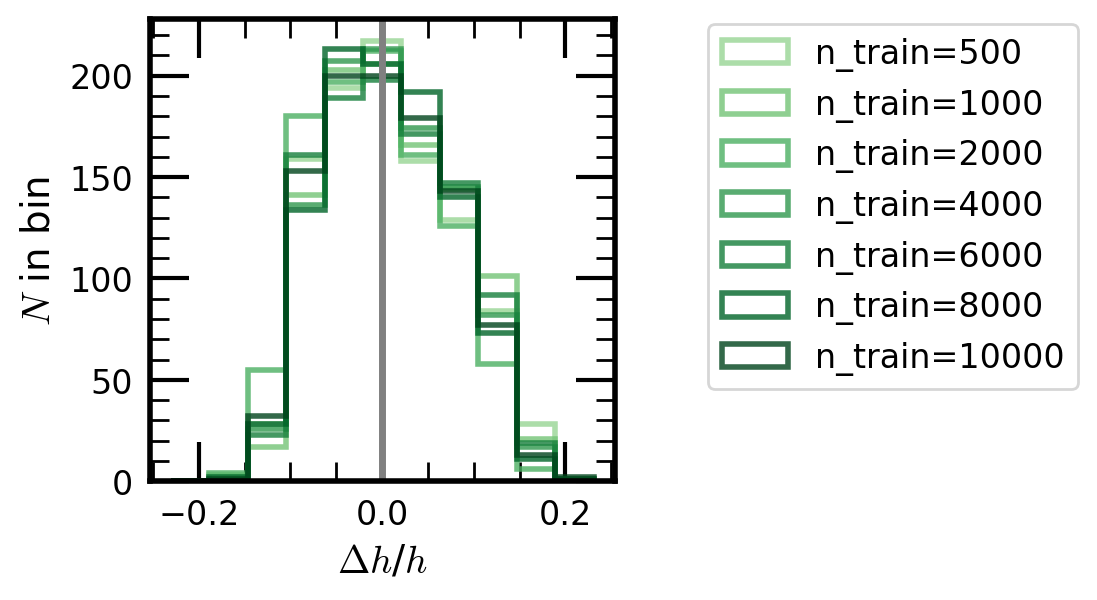

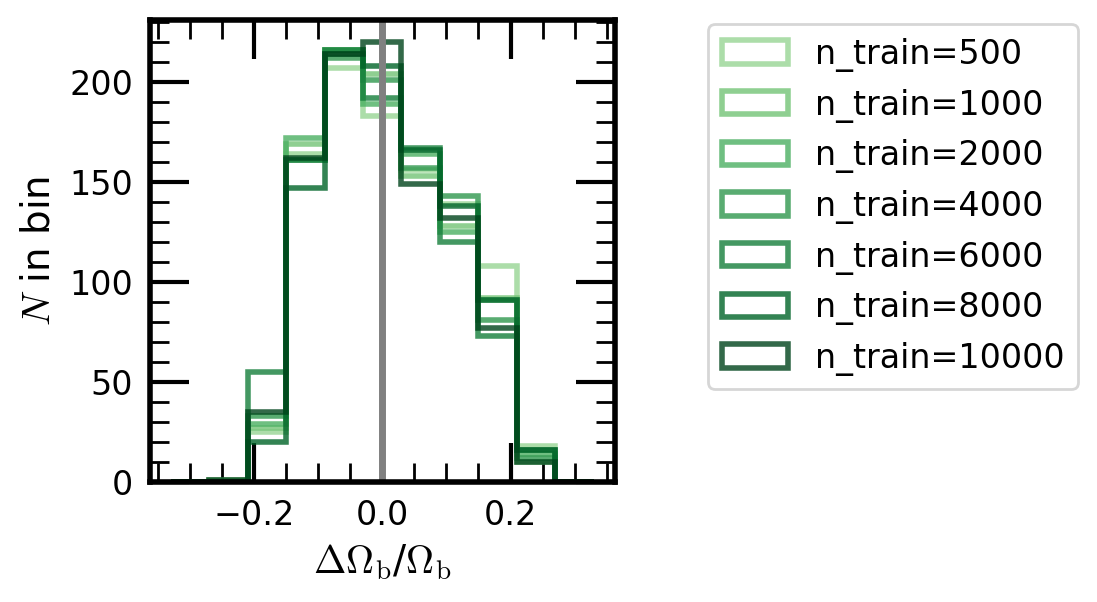

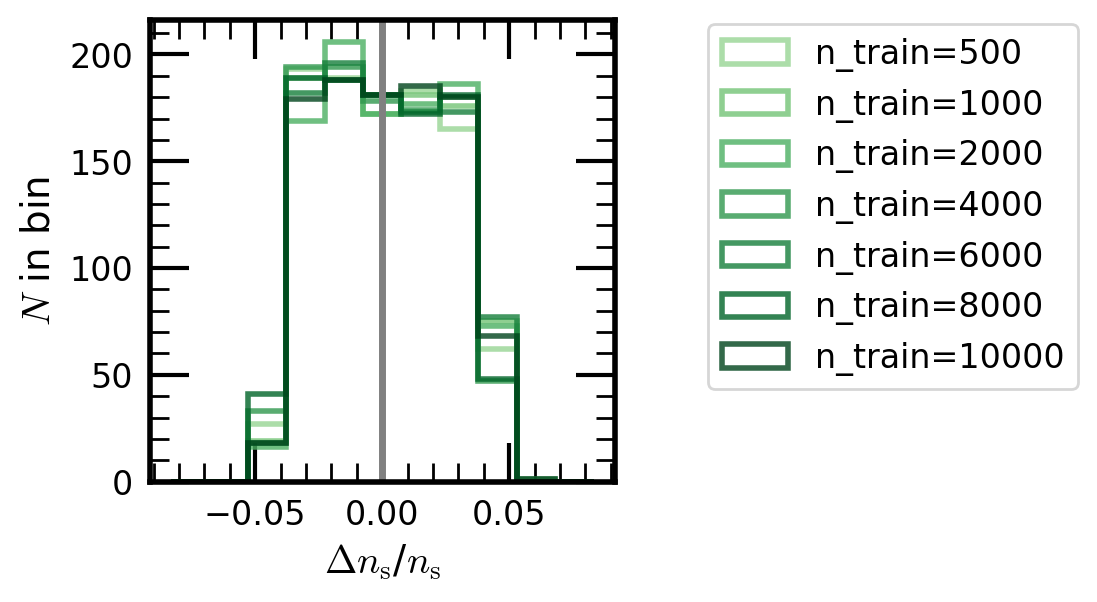

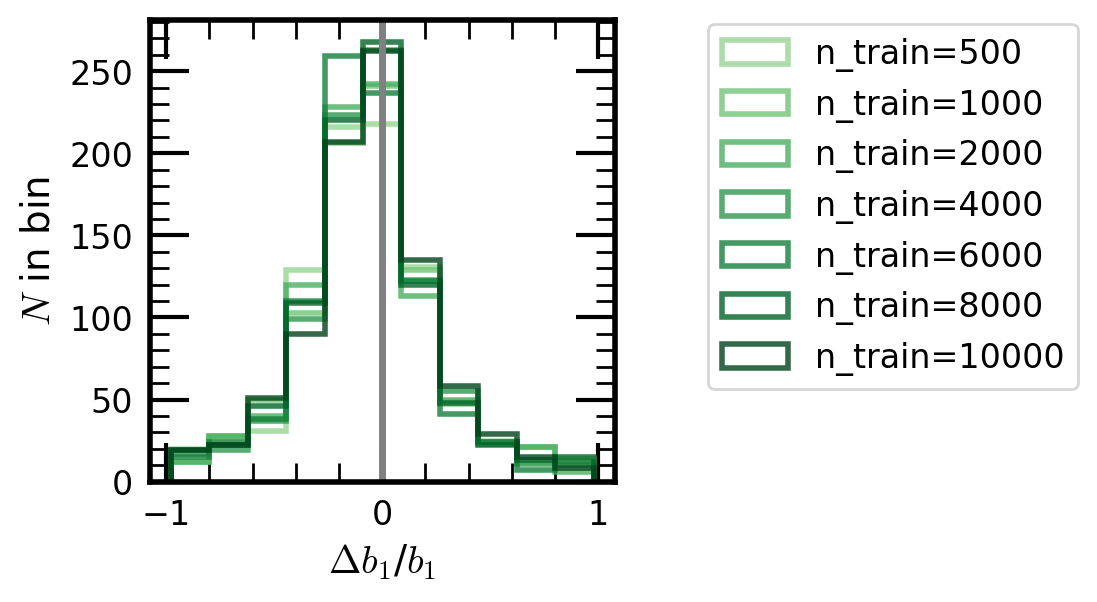

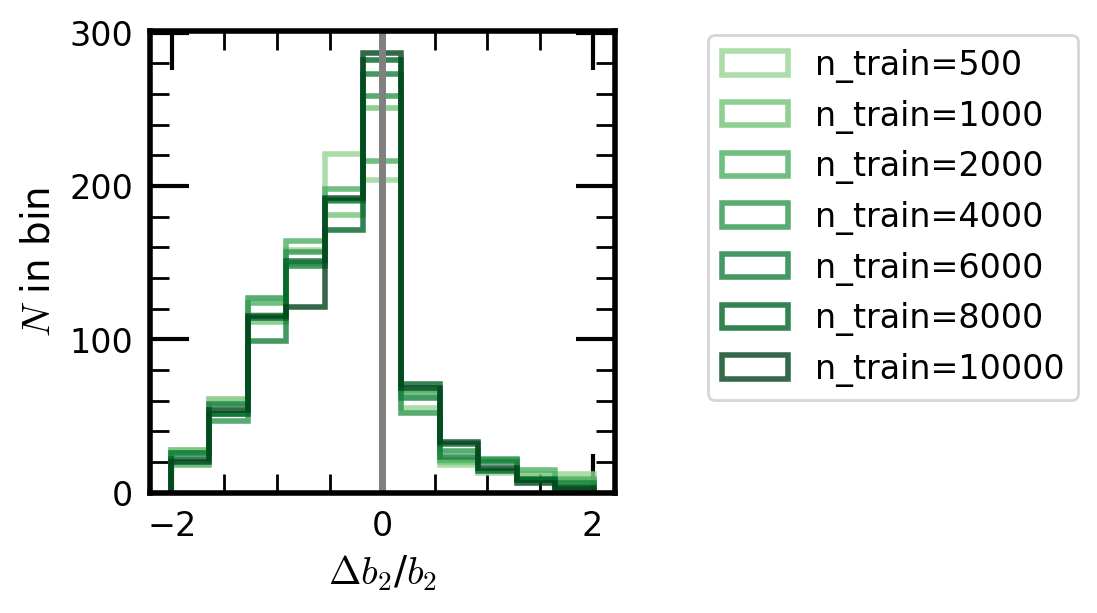

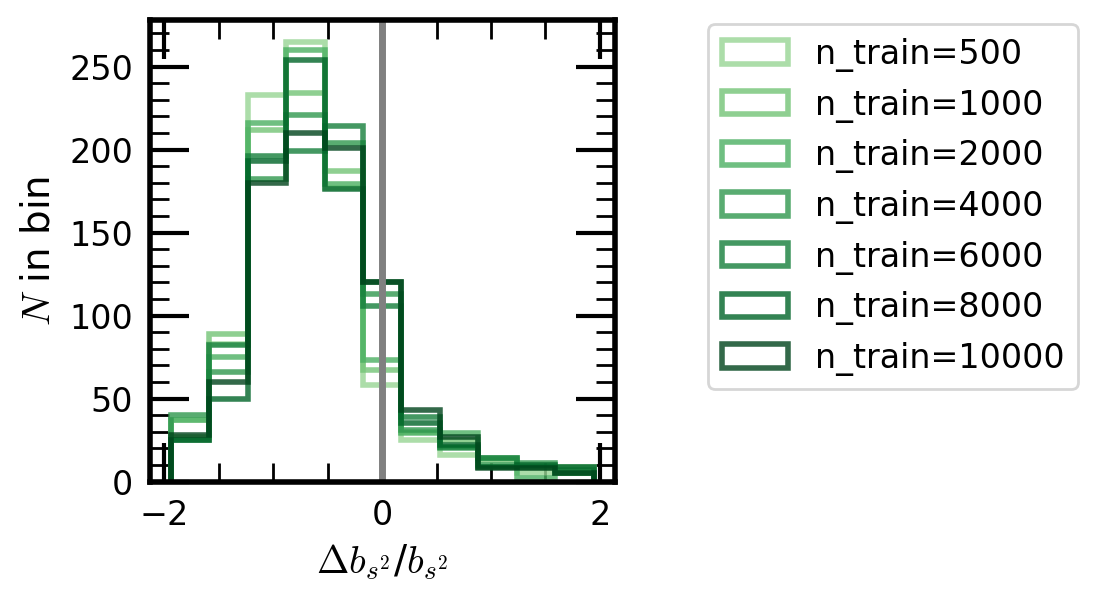

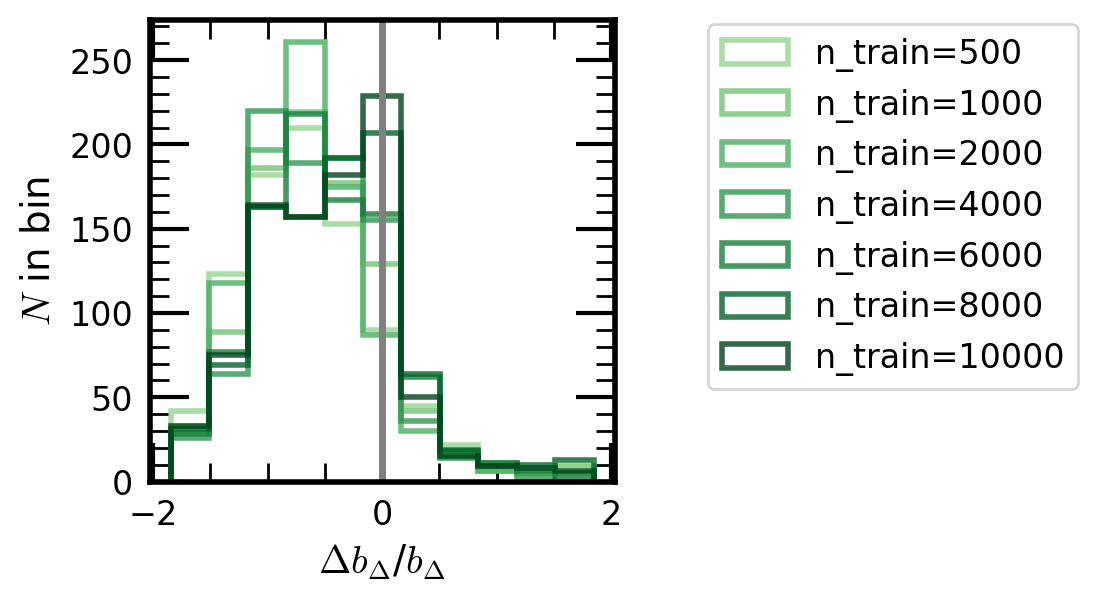

In [27]:
param_labels = [utils.param_label_dict[pns] for pns in param_names_show]
plotter.plot_hists_mean(theta_pred_arr, theta_true_arr, param_labels, 
                        color_arr=colors, label_arr=labels_extra,
                        n_bins=12, alpha=0.8, histtype='step',
                        xlim_auto=False)

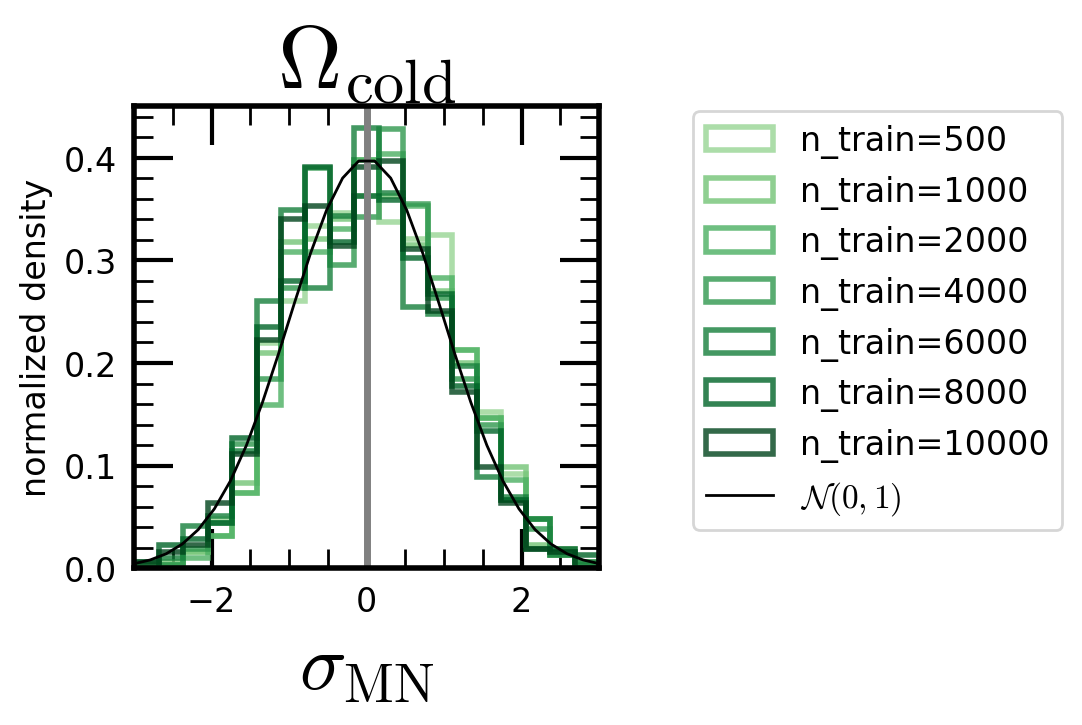

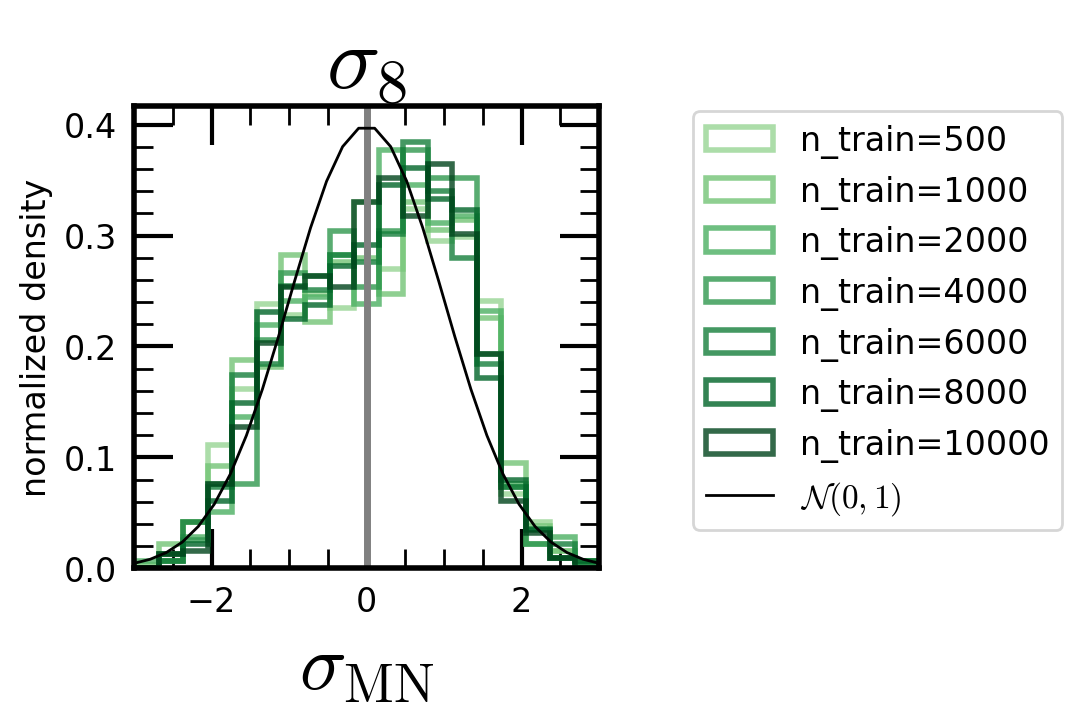

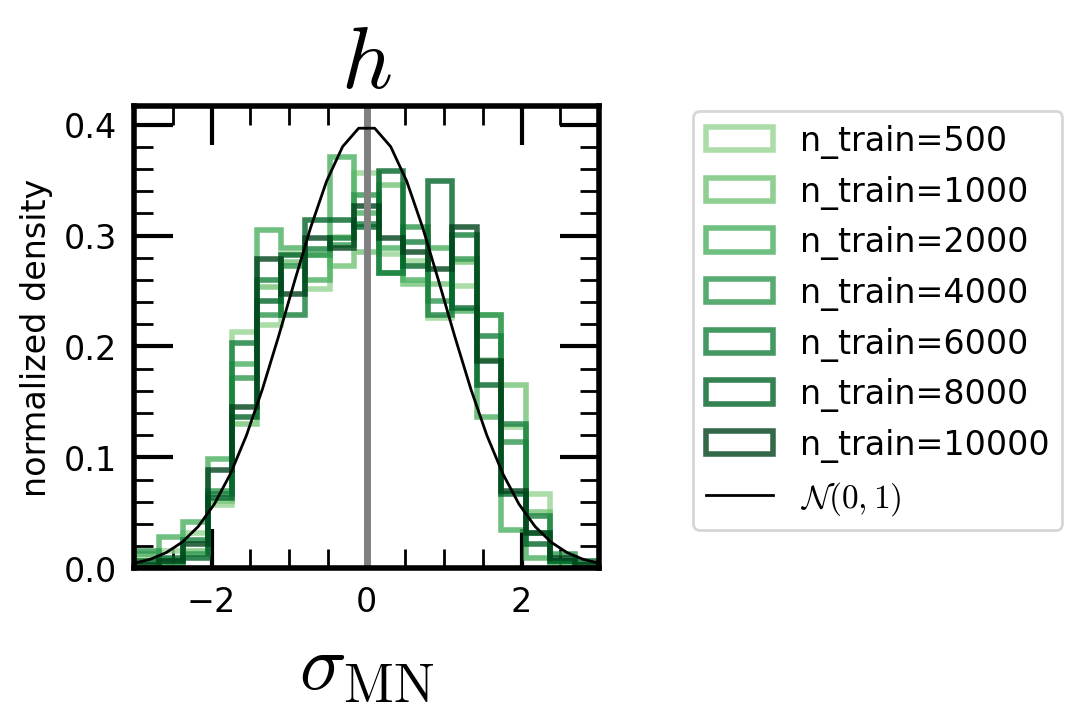

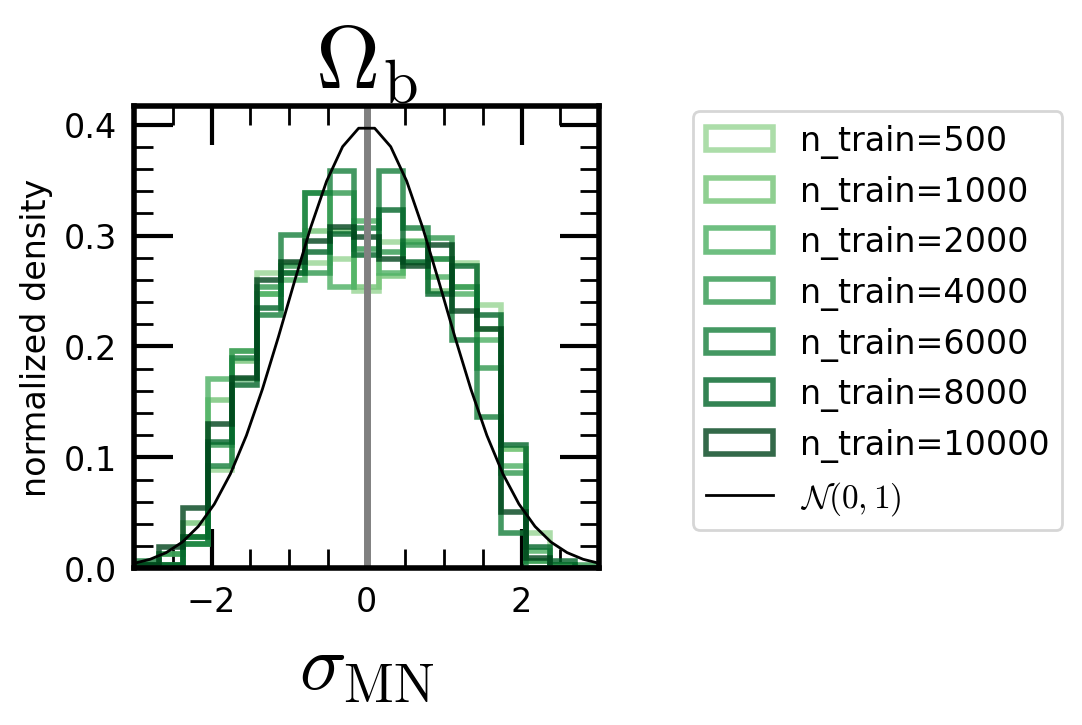

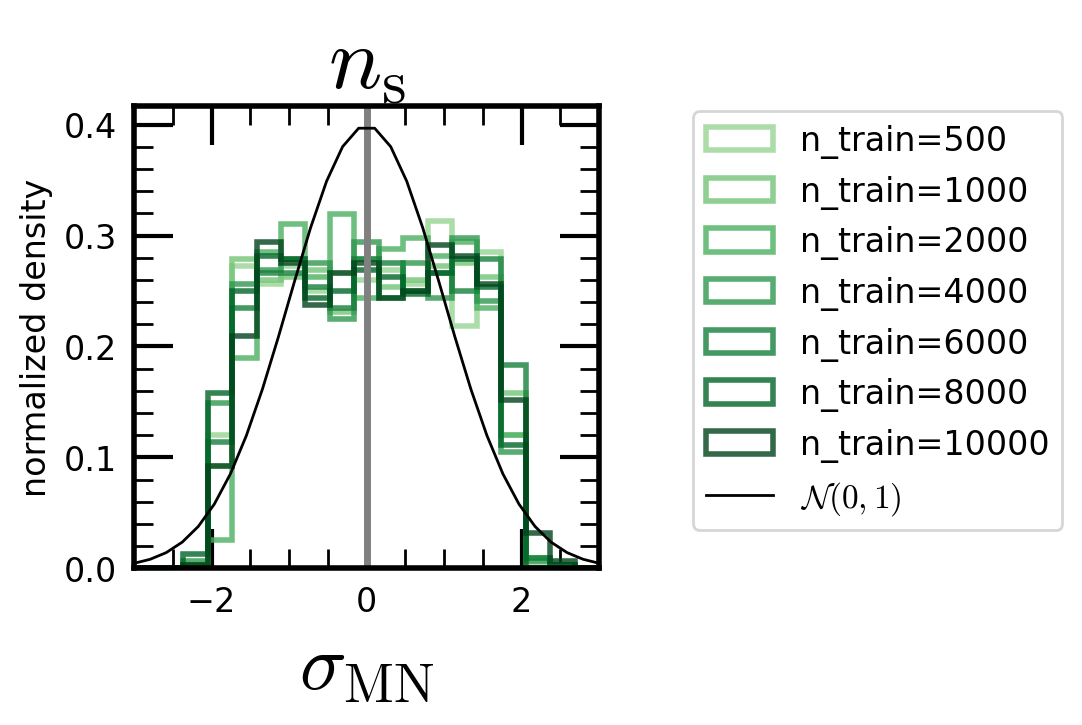

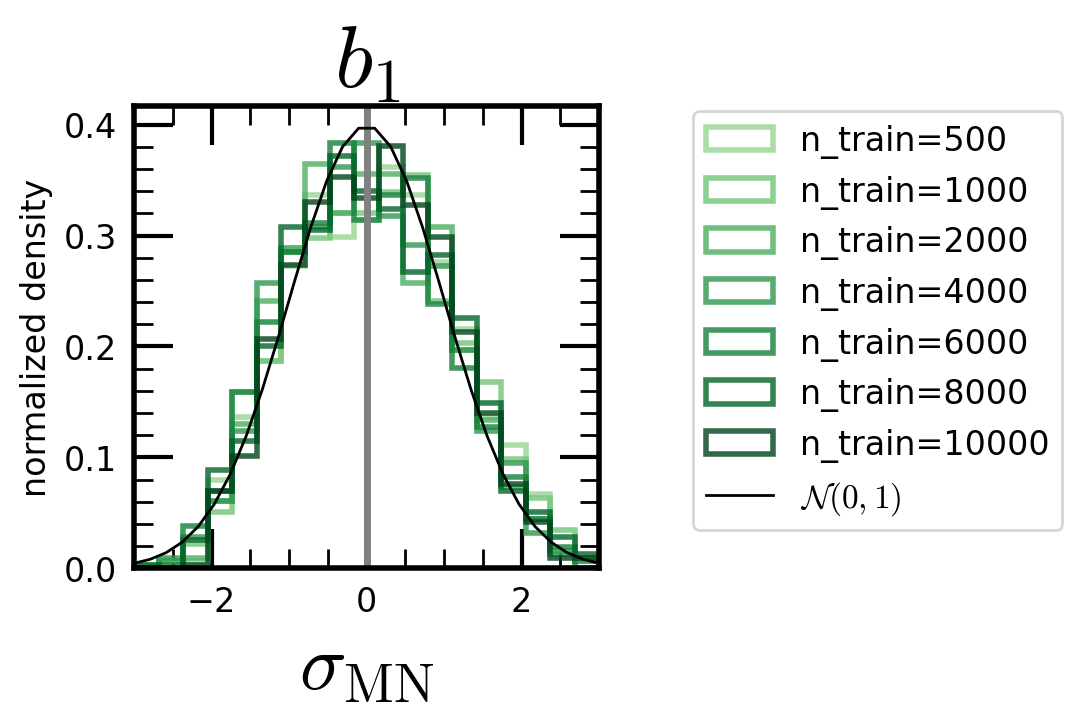

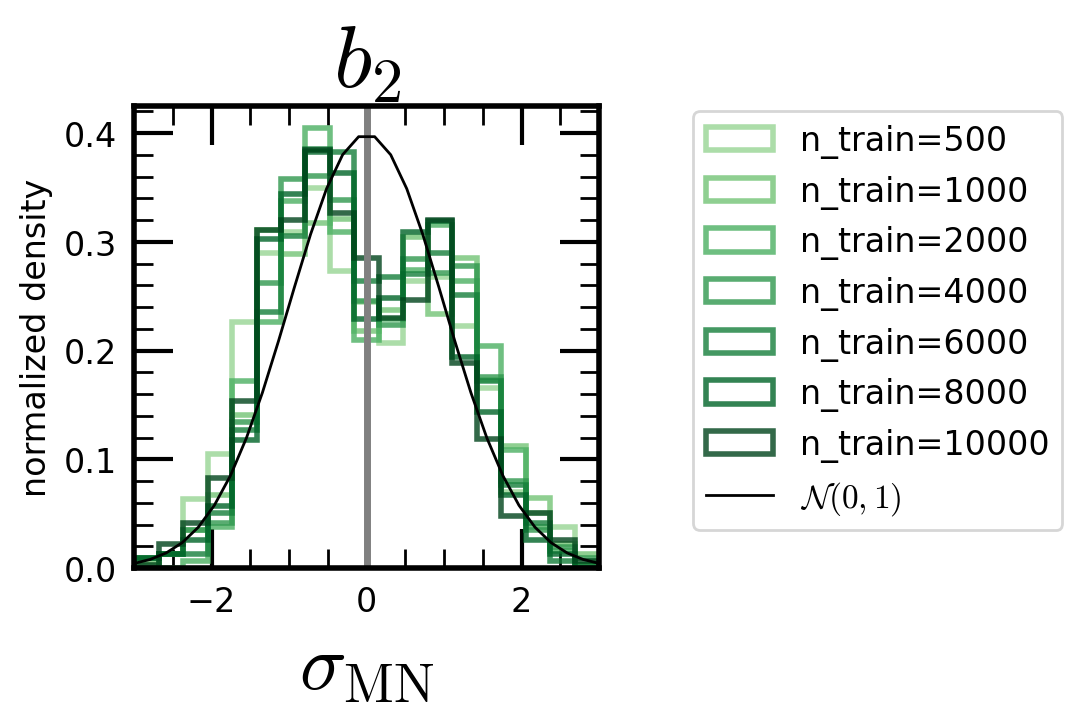

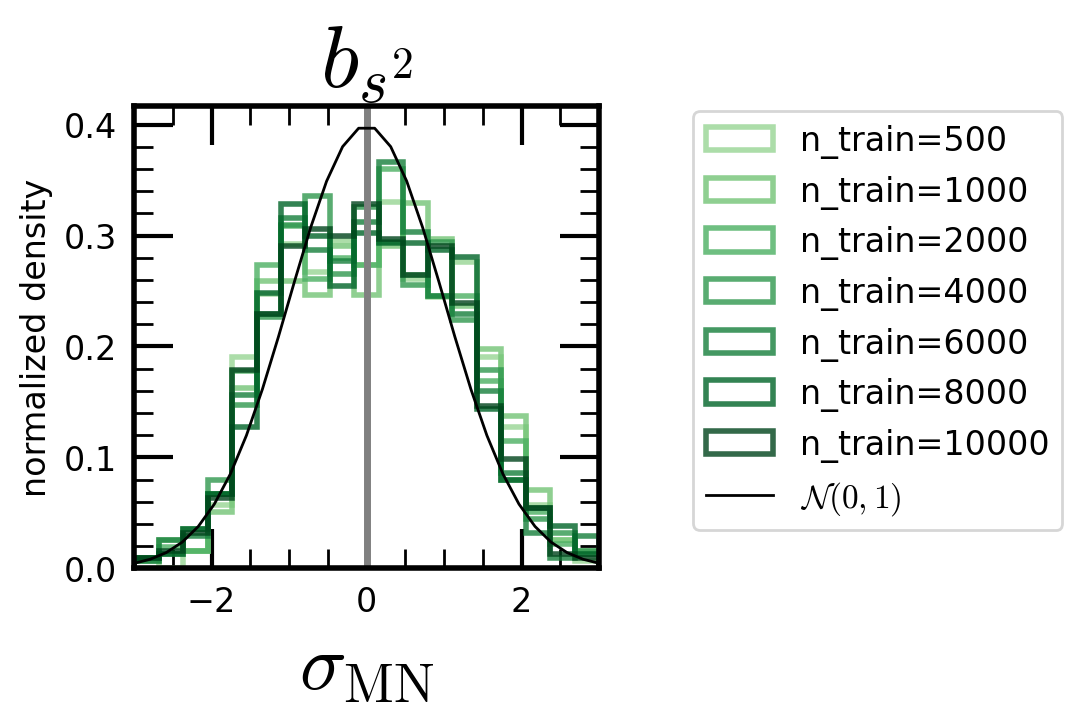

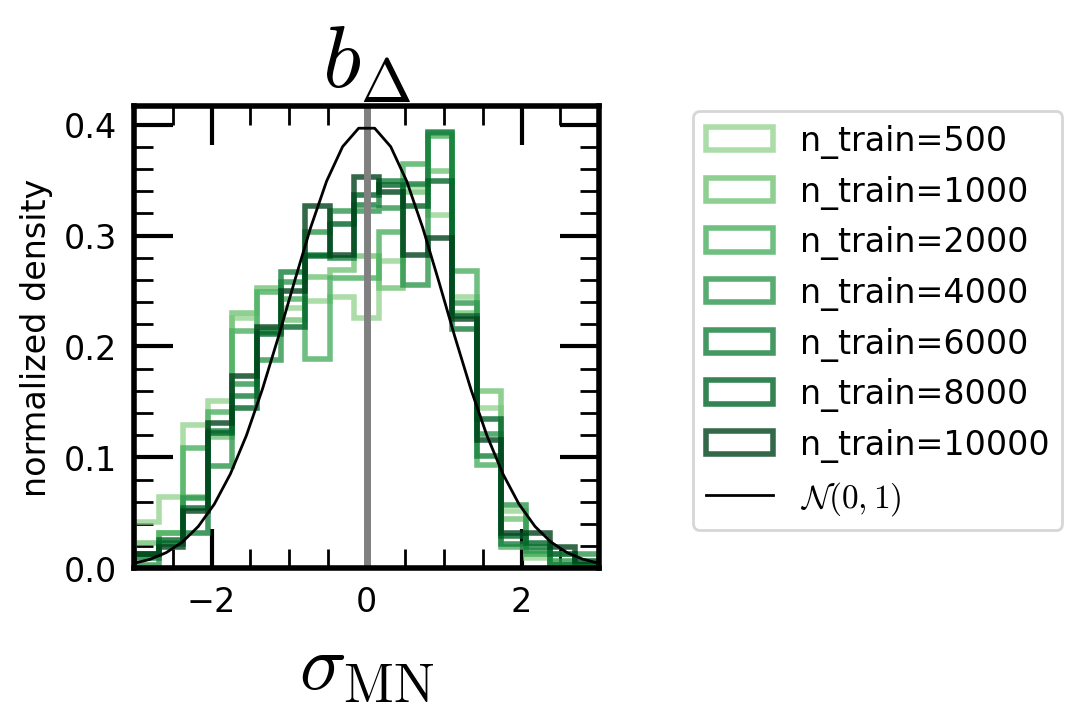

In [28]:
plotter.plot_hists_var(theta_true_arr, theta_pred_arr, vars_pred_arr, param_labels,
                        color_arr=colors, label_arr=labels_extra,
                        #bins=10, 
                        alpha=0.8, histtype='step')

In [29]:
def loss_mse(theta_true, theta_pred):
    if theta_true.ndim == 1:
        return (theta_true - theta_pred)**2
    else:
        return np.mean((theta_true - theta_pred)**2, axis=1)

In [30]:
def chi2(theta_true, theta_pred, covs_pred):
    chi2s = []
    print(theta_true.shape, theta_pred.shape, covs_pred.shape)
    if covs_pred.ndim == 3:
        for t_true, t_pred, cov_pred in zip(theta_true, theta_pred, covs_pred):
            diff = t_true - t_pred
            cov_pred_inv = np.linalg.inv(cov_pred)
            #print(diff.shape, cov_pred_inv.shape)
            chi2 = diff.T @ cov_pred_inv @ diff
            chi2s.append(chi2)
    else:
        chi2 = (theta_true - theta_pred)/np.sqrt(covs_pred)
        chi2s.append(chi2)
    return chi2s

In [31]:
loss_test_arr = []
chi2_test_arr = []
for theta_true, theta_pred, cov_pred in zip(theta_true_arr, theta_pred_arr, covs_pred_arr):
    loss_test = loss_mse(theta_true, theta_pred)
    loss_test_arr.append(loss_test)
    
    chi2_test = chi2(theta_true, theta_pred, cov_pred)
    chi2_test_arr.append(chi2_test)

(1000, 9) (1000, 9) (1000, 9, 9)
(1000, 9) (1000, 9) (1000, 9, 9)
(1000, 9) (1000, 9) (1000, 9, 9)
(1000, 9) (1000, 9) (1000, 9, 9)
(1000, 9) (1000, 9) (1000, 9, 9)
(1000, 9) (1000, 9) (1000, 9, 9)
(1000, 9) (1000, 9) (1000, 9, 9)


Text(0, 0.5, 'median MSE loss')

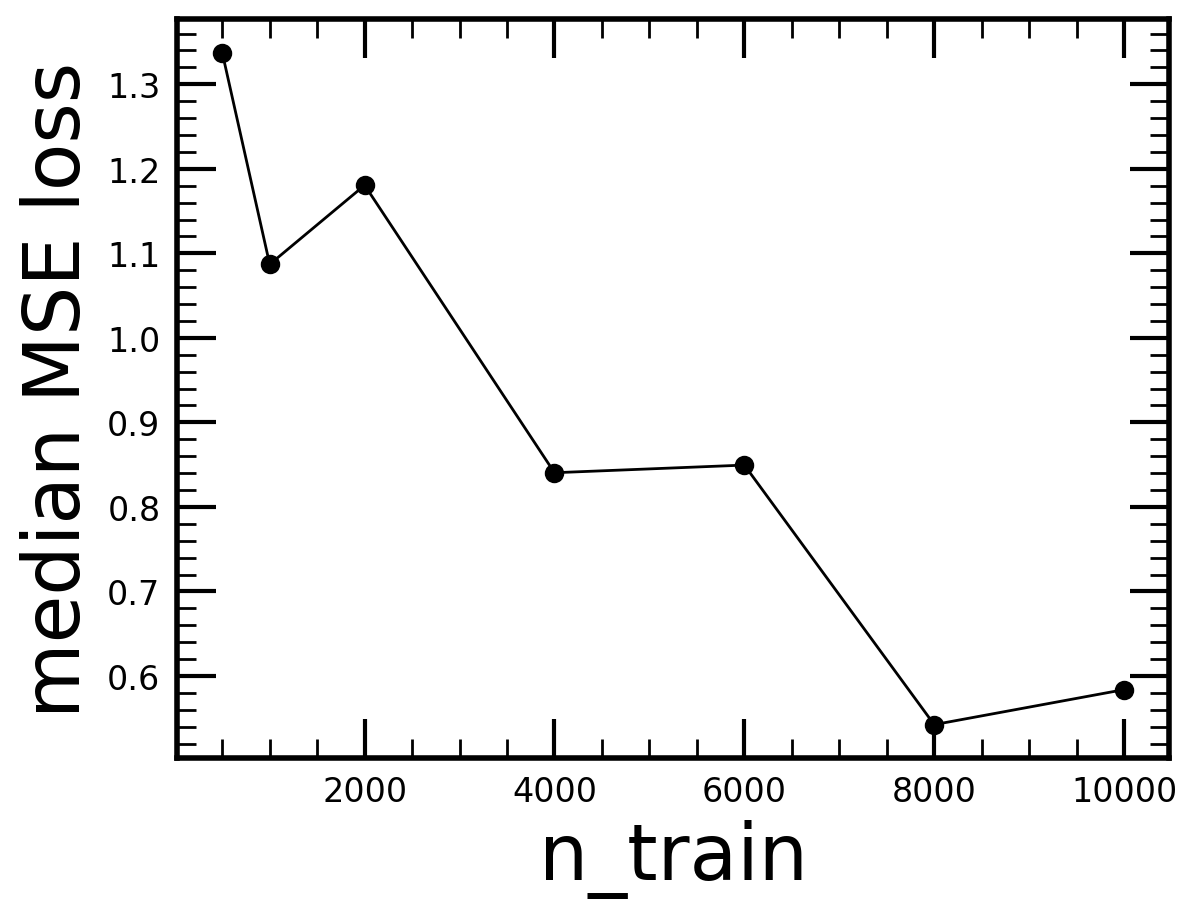

In [32]:
plt.plot(n_train_arr, np.median(loss_test_arr, axis=1), marker='o', lw=1, color='k')
#plt.errorbar(n_train_arr, np.median(loss_test_arr, axis=1), yerr=np.std(loss_test_arr, axis=1), marker='o', lw=1, color='k')
plt.xlabel('n_train')
plt.ylabel('median MSE loss')

Text(0, 0.5, 'median reduced $\\chi^2$')

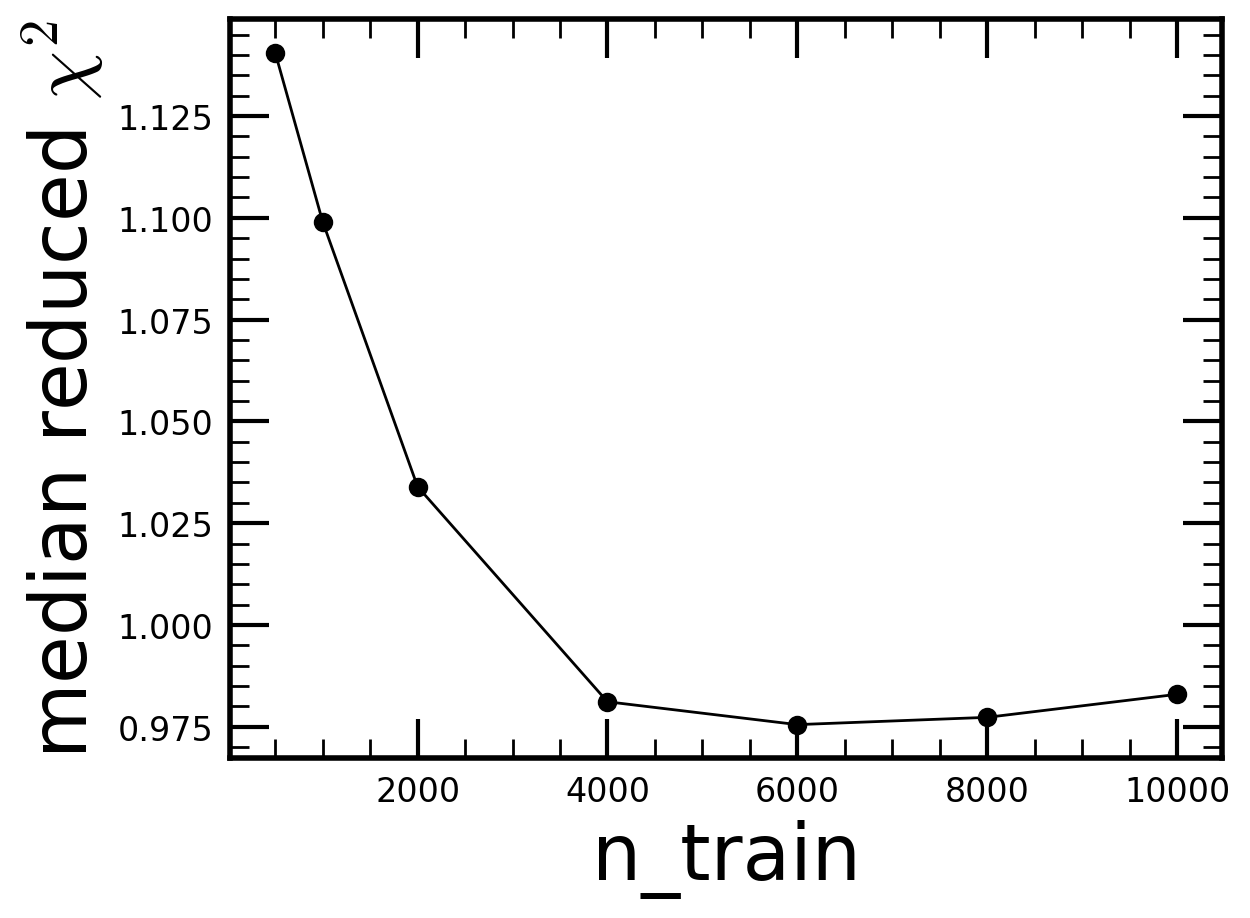

In [33]:
chi2_test_arr = np.array(chi2_test_arr)
# plt.errorbar(n_train_arr, np.median(chi2_test_arr/len(param_names_vary), axis=1), 
#              yerr=np.std(chi2_test_arr/len(param_names_vary), axis=1), marker='o', lw=1, color='k')
plt.plot(n_train_arr, np.median(chi2_test_arr, axis=1)/len(param_names_vary), marker='o', lw=1, color='k')
plt.xlabel('n_train')
plt.ylabel('median reduced $\chi^2$')

In [34]:
theta_true_arr.shape

(7, 1000, 9)

omega_cold
sigma8_cold
hubble
omega_baryon
ns
b1
b2
bs2
bl


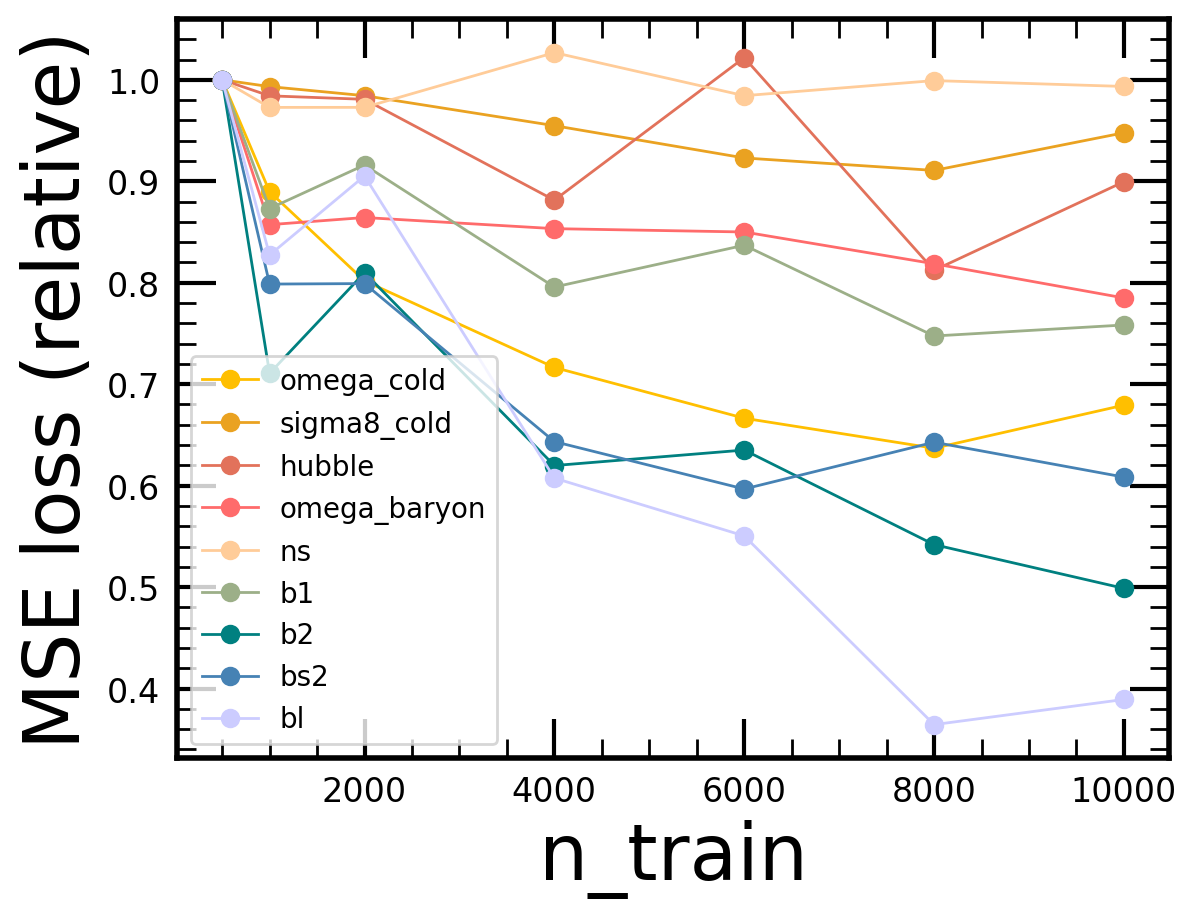

In [35]:
colors_params = ["#FFBF00", "#EAA221", "#E2725B", "#FF6B6B", "#FFCC99", "#9CAF88", "#008080", "#4682B4", "#CCCCFF"]

for i_pn, param_name in enumerate(param_names_vary):
    loss_param_test_arr = []
    
    print(param_name)
    # if param_name != 'bl':
    #     continue

    for theta_true, theta_pred in zip(theta_true_arr, theta_pred_arr):
        
        #print(theta_true[:,i_pn][:10])
        #print(theta_pred[:,i_pn][:10])
        
        loss_test = np.median(loss_mse(theta_true[:,i_pn], theta_pred[:,i_pn]))
        loss_param_test_arr.append(loss_test)
        
    loss_param_test_arr = np.array(loss_param_test_arr)

    # plt.plot(n_train_arr, loss_param_test_arr, 
    #          marker='o', lw=1, color=colors_params[i_pn], label=param_name)
        
    # plt.plot(n_train_arr, loss_param_test_arr/np.var(theta_true_arr[0,:,i_pn]), 
    #          marker='o', lw=1, color=colors_params[i_pn], label=param_name)

    plt.plot(n_train_arr, loss_param_test_arr/loss_param_test_arr[0], 
             marker='o', lw=1, color=colors_params[i_pn], label=param_name)
    
    # param_range = np.max(theta_true_arr[:,:,i_pn]) - np.min(theta_true_arr[:,:,i_pn])
    # print(param_range, np.min(theta_true_arr[:,:,i_pn]), np.max(theta_true_arr[:,:,i_pn]))
    # plt.plot(n_train_arr, loss_param_test_arr/param_range**2, 
    #         marker='o', lw=1, color=colors_params[i_pn], label=param_name)

plt.xlabel('n_train')
plt.ylabel('MSE loss (relative)')
plt.legend(fontsize=10)


(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) (1000,)
(1000,) (1000,) 

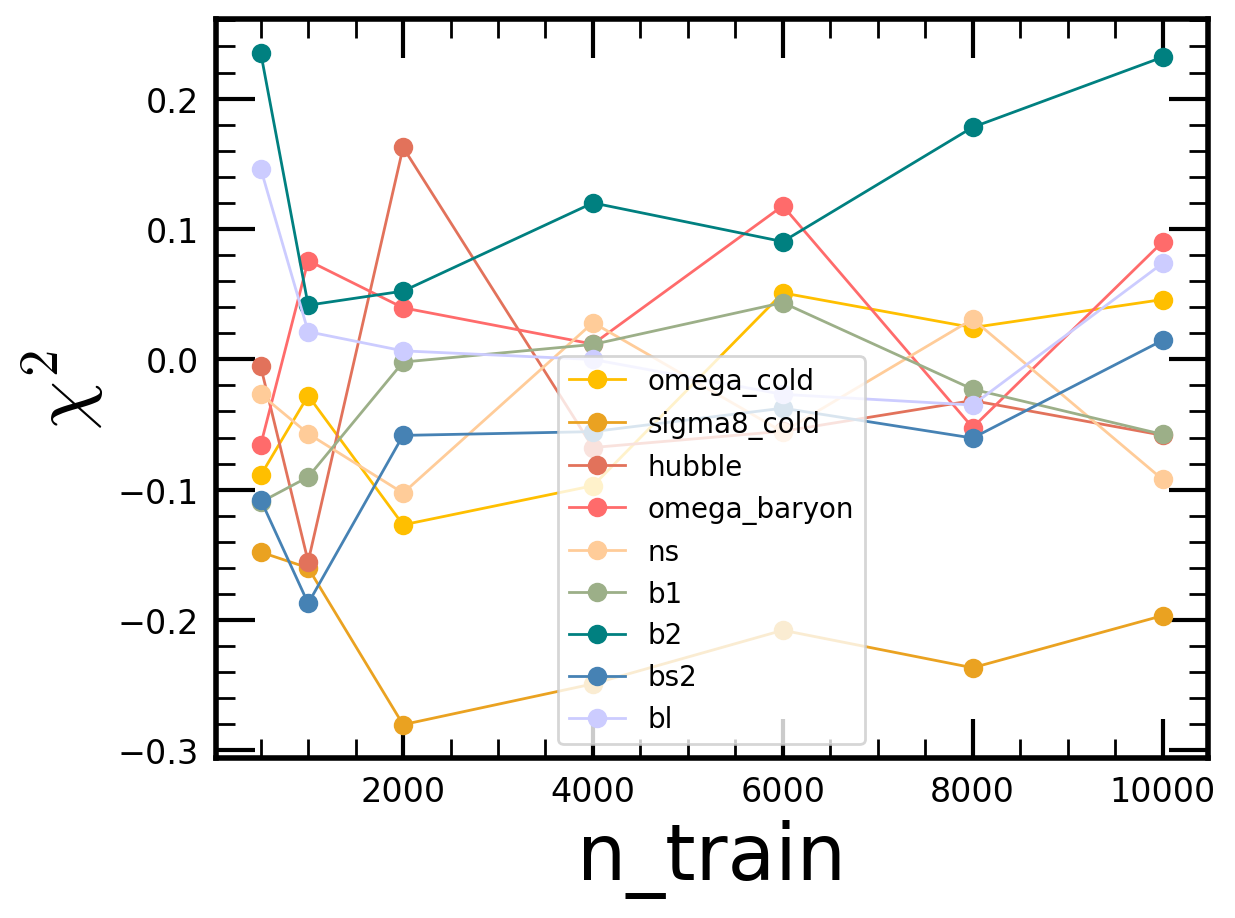

In [36]:
colors_params = ["#FFBF00", "#EAA221", "#E2725B", "#FF6B6B", "#FFCC99", "#9CAF88", "#008080", "#4682B4", "#CCCCFF"]

for i_pn, param_name in enumerate(param_names_vary):
    chi2_param_test_arr = []

    for theta_true, theta_pred, covs_pred in zip(theta_true_arr, theta_pred_arr, covs_pred_arr):
        chi2_test = np.median(chi2(theta_true[:,i_pn], theta_pred[:,i_pn], covs_pred[:,i_pn,i_pn]))
        chi2_param_test_arr.append(chi2_test)
        
    chi2_param_test_arr = np.array(chi2_param_test_arr)
    # plt.plot(n_train_arr, chi2_param_test_arr/chi2_param_test_arr[-1], 
    #          marker='o', lw=1, color=colors_params[i_pn], label=param_name)
    plt.plot(n_train_arr, chi2_param_test_arr, 
            marker='o', lw=1, color=colors_params[i_pn], label=param_name)

plt.xlabel('n_train')
plt.ylabel('$\chi^2$')
plt.legend(fontsize=10)
